In [1]:
!pip install wfdb
!pip install hrv-analysis
!pip install py-ecg-detectors
!pip install neurokit2

In [2]:
import pprint
import os
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import wfdb
import hrvanalysis
import ecgdetectors
import hrv
import neurokit2 as nk

## Smart Health for Assessing the Risk of Events via ECG Database

https://physionet.org/content/shareedb/1.0.0/

In [25]:
# DOWNLOAD_PATH = "https://physionet.org/content/shareedb/1.0.0/"
# SAVE_DIR = "/content/drive/MyDrive/Projects/HRV/dataset"
# !wget -r -N -c -np $DOWNLOAD_PATH -P $SAVE_DIR

!wget -r -N -c -np https://physionet.org/files/shareedb/1.0.0/ -P /content/dataset

--2023-06-29 12:49:43--  https://physionet.org/files/shareedb/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/dataset/physionet.org/files/shareedb/1.0.0/index.html’

physionet.org/files     [ <=>                ]  47.31K  --.-KB/s    in 0.05s   

Last-modified header missing -- time-stamps turned off.
2023-06-29 12:49:43 (912 KB/s) - ‘/content/dataset/physionet.org/files/shareedb/1.0.0/index.html’ saved [48441]

Loading robots.txt; please ignore errors.
--2023-06-29 12:49:43--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘/content/dataset/physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2023-06-29 12:49:43 (4.60 MB/s) - ‘/c

In [26]:
!cp -R /content/dataset/physionet.org/files/shareedb/1.0.0/* /content/drive/MyDrive/Projects/HRV/dataset/physionet.org/files/shareedb/1.0.0/

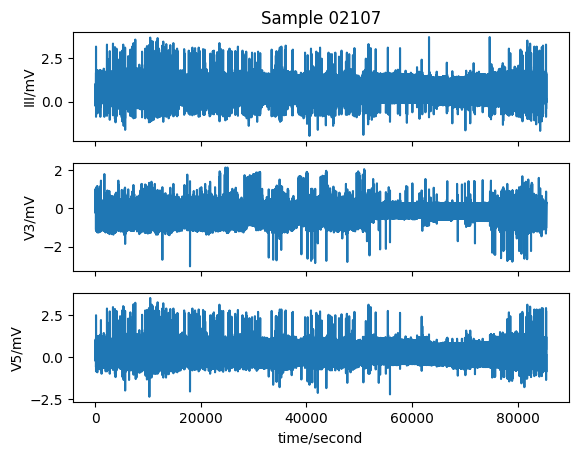

{'adc_gain': [35.0, 35.0, 35.0],
 'adc_res': [8, 8, 8],
 'adc_zero': [0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(9, 17, 33),
 'baseline': [-5, -5, -5],
 'block_size': [0, 0, 0],
 'byte_offset': [None, None, None],
 'checksum': [-28546, -3795, -11341],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['02107.dat', '02107.dat', '02107.dat'],
 'fmt': ['80', '80', '80'],
 'fs': 128,
 'init_value': [0, 10, 20],
 'n_sig': 3,
 'p_signal': array([[0.14285714, 0.42857143, 0.71428571],
       [0.14285714, 0.14285714, 0.14285714],
       [0.14285714, 0.14285714, 0.14285714],
       ...,
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan]]),
 'record_name': '02107',
 'samps_per_frame': [1, 1, 1],
 'sig_len': 10936448,
 'sig_name': ['III', 'V3', 'V5'],
 'skew': [None, None, None],
 'units': ['mV', 'mV', 'mV']}


In [5]:
SHAREEDB_DIR = "/content/drive/MyDrive/Projects/HRV/dataset/physionet.org/files/shareedb/1.0.0/"
record = wfdb.rdrecord(os.path.join(SHAREEDB_DIR, "02107"))
wfdb.plot_wfdb(record=record, title="Sample 02107")
pprint.pprint(record.__dict__)

In [6]:
df_infotxt = pd.read_csv(os.path.join(SHAREEDB_DIR, "info.txt"), sep="\t")
notes = df_infotxt[139:]["Record"].values
df_infotxt["Record"] = df_infotxt["Record"].map(lambda x: '0'+x)
df_infotxt = df_infotxt[:139].set_index("Record")
df_infotxt["Risk"] = df_infotxt["Vascular event"].map(lambda x: 0 if x == 'none' else 1)
df_infotxt

,Gender,Age,Weight,Height,BSA,BMI,Smoker,SBP,SBP.1,IMT MAX,LVMi,EF,Vascular event,Risk
Record,,,,,,,,,,,,,,
01911,M,56.0,105.0,180.0,2.29,32.41,yes,140.0,80.0,4.0,123.0,66.0,none,0
02012,M,72.0,83.0,169.0,1.97,29.06,no,130.0,75.0,NaN,121.0,69.0,none,0
02019,F,80.0,80.0,165.0,1.91,29.38,no,177.0,75.0,2.5,164.0,56.0,none,0
02020,M,77.0,88.0,178.0,2.09,27.77,no,140.0,85.0,2.7,115.0,67.0,none,0
02025,F,66.0,80.0,174.0,1.97,26.42,no,110.0,65.0,1.5,98.0,66.0,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02403,F,78.0,55.0,157.0,1.55,22.31,no,170.0,60.0,2.3,136.0,64.0,syncope,1
02412,M,70.0,98.0,176.0,2.19,31.64,no,130.0,75.0,2.2,131.0,54.0,myocardial infarction,1
02413,M,78.0,74.0,170.0,1.87,25.61,no,125.0,65.0,2.3,170.0,32.0,none,0


In [7]:
def slice_signal(record_obj, start_sec=0, end_sec=10, fs=250, _print=True):
    start = fs*start_sec
    end = fs*end_sec
    signal = record_obj.p_signal[start:end, 0]

    if _print:
        print("start        :", start)
        print("end          :", end)
        print("len(signal)  :", len(signal))
        print("seconds      :", end_sec - start_sec)

    detectors = ecgdetectors.Detectors(fs)
    r_peaks = detectors.two_average_detector(signal)
    if _print:
        print("len(r_peaks) :", len(r_peaks))
    return signal, r_peaks

def plot_signal(signal: np.array, r_peaks: list=None, figsize=(6, 4), slice_points=None):
    fig = plt.figure(figsize=figsize)
    plt.plot(signal)
    plt.gca().set_xlabel("")
    plt.gca().set_ylabel("mV")

    # ref: https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
    if r_peaks:
        for xc in r_peaks:
            plt.axvline(x=xc, color='red', linestyle='--')

    if slice_points is not None:
        for xc in slice_points:
            plt.axvline(x=xc, color='black', linestyle='-')

    plt.show()

def rolling_slice(record_obj, start_sec=0, end_sec=20, size_sec=5, fs=250, _plot_signal=True, _print=True):
    full_r_peaks = []
    if end_sec == 'full':
        end_sec = len(record_obj.p_signal[:, 0]) // FS

    for _start_sec in range(start_sec, end_sec, size_sec):
        signal, r_peaks = slice_signal(record_obj, start_sec=_start_sec, end_sec=_start_sec+size_sec, fs=fs, _print=_print)
        r_peaks = list(np.array(r_peaks) + _start_sec*fs)
        full_r_peaks += r_peaks
        if _plot_signal:
            plot_signal(signal, r_peaks)
        if _print:
            print(r_peaks)
    if _print:
        print("len(full_r_peaks):", len(full_r_peaks))
    return full_r_peaks

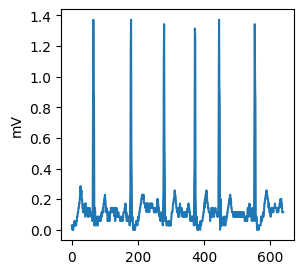

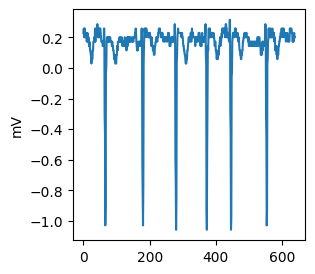

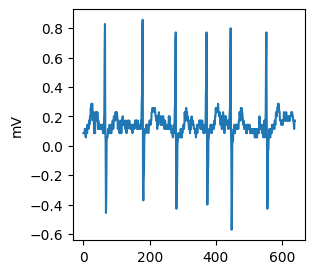

In [8]:
record = wfdb.rdrecord(os.path.join(SHAREEDB_DIR, "02107"))
FS = 128
_second = 1000
_duration = 5
sig_1 = record.p_signal[_second*FS:(_second+_duration)*FS, 0]
sig_2 = record.p_signal[_second*FS:(_second+_duration)*FS, 1]
sig_3 = record.p_signal[_second*FS:(_second+_duration)*FS, 2]
plot_signal(sig_1, figsize=(3, 3))
plot_signal(sig_2, figsize=(3, 3))
plot_signal(sig_3, figsize=(3, 3))

In [9]:
start_time = datetime.datetime.now()

shareedb = {}

START_SEC = 0
# END_SEC = 3600*18 # 18 jam
END_SEC = "full"
SIZE_SEC = 60 # 1 menit
FS = 128
_PLOT_SIGNAL = False
_PRINT = False
print("FS:", FS)
for record in wfdb.get_record_list("shareedb"):
    try:
        print("Record:", record)
        record_obj = wfdb.rdrecord(os.path.join(SHAREEDB_DIR, record))
        print("  signal length          :", record_obj.sig_len)
        print("  recording time (hours) :", record_obj.sig_len / (3600*FS))
        print("  comments               :", record_obj.comments)

        r_peaks = rolling_slice(
            record_obj,
            start_sec=START_SEC,
            end_sec=END_SEC,
            size_sec=SIZE_SEC,
            fs=FS,
            _plot_signal=_PLOT_SIGNAL,
            _print=_PRINT
        )
        # retrieve rr_interval from distance between 2 r_peak points
        rri = [r_peaks[i+1] - r_peaks[i] for i in range(len(r_peaks) - 1)]
        # convert the unit from freq_sample to milisecond
        rri = list(np.array(rri) * 1000 / FS)
        print("  len(r_peaks)           :", len(r_peaks))
        print("  len(rri)               :", len(rri))
        print("  recording time (secs)  :", record_obj.sig_len / FS)
        print("  r_peak / seconds       :", len(r_peaks) / (record_obj.sig_len / FS))

        RMSSD = hrv.HRV(FS).RMSSD(r_peaks)
        SDNN = hrv.HRV(FS).SDNN(r_peaks)
        print("  RMSSD                  :", RMSSD)
        print("  SDNN                   :", SDNN)

        nni = hrvanalysis.get_nn_intervals(rri)
        print("  len(nni)               :", len(nni))
        time_domain = hrvanalysis.extract_features.get_time_domain_features(nni)
        print("  time_domain computed")
        freq_domain = hrvanalysis.extract_features.get_frequency_domain_features(nni)
        print("  freq_domain computed")


        shareedb[record] = {
            "id": "shareedb-" + str(record),
            "db_source": "shareedb",
            "age": df_infotxt.loc[record, "Age"],
            "gender": df_infotxt.loc[record, "Gender"],
            "fs": FS,
            "signal_length": record_obj.sig_len,
            "recording_time_hours": record_obj.sig_len / (3600 * FS),
            "recording_time_seconds": record_obj.sig_len // FS,
            "rri_length": len(rri),
            "nni_length": len(nni),
            **time_domain,
            **freq_domain,
            "cardiac_info": df_infotxt.loc[record, "Vascular event"],
            "risk": df_infotxt.loc[record, "Risk"]
        }
        print("  RECORD {} SAVED!".format(record))
    except:
        print("\n ERROR (%s)\n" %record)


end_time = datetime.datetime.now()
print("Running time:", end_time - start_time)

FS: 128
Record: 01911
  signal length          : 10322048
  recording time (hours) : 22.400277777777777
  comments               : []
  len(r_peaks)           : 104557
  len(rri)               : 104556
  recording time (secs)  : 80641.0
  r_peak / seconds       : 1.2965737032030853
  RMSSD                  : 93.6330440368094
  SDNN                   : 172.10243105309422
39 outlier(s) have been deleted.
The outlier(s) value(s) are : [289.0625, 2007.8125, 2054.6875, 2015.625, 2015.625, 2039.0625, 2117.1875, 2289.0625, 2195.3125, 2265.625, 2117.1875, 2054.6875, 2031.25, 2125.0, 2164.0625, 2125.0, 2140.625, 2179.6875, 2187.5, 2039.0625, 2179.6875, 2148.4375, 2007.8125, 2226.5625, 2007.8125, 2093.75, 2125.0, 2203.125, 2031.25, 2039.0625, 2070.3125, 2046.875, 2062.5, 2812.5, 2078.125, 2078.125, 2054.6875, 2187.5, 2093.75]
1021 ectopic beat(s) have been deleted with kamath rule.
  len(nni)               : 104556
  time_domain computed
  freq_domain computed
  RECORD 01911 SAVED!
Record: 02012

In [16]:
START_SEC = 0
# END_SEC = 3600*18 # 18 jam
END_SEC = "full"
SIZE_SEC = 60 # 1 menit
FS = 128
_PLOT_SIGNAL = False
_PRINT = False
print("FS:", FS)

err_records = ['02012']
for record in err_records:
    print("Record:", record)
    try:
        record_obj = wfdb.rdrecord(os.path.join(SHAREEDB_DIR, record))
    except:
        record_obj = wfdb.rdrecord(record, pn_dir='shareedb')
    print("  signal length          :", record_obj.sig_len)
    print("  recording time (hours) :", record_obj.sig_len / (3600*FS))
    print("  comments               :", record_obj.comments)

    r_peaks = rolling_slice(
        record_obj,
        start_sec=START_SEC,
        end_sec=END_SEC,
        size_sec=SIZE_SEC,
        fs=FS,
        _plot_signal=_PLOT_SIGNAL,
        _print=_PRINT
    )
    # retrieve rr_interval from distance between 2 r_peak points
    rri = [r_peaks[i+1] - r_peaks[i] for i in range(len(r_peaks) - 1)]
    # convert the unit from freq_sample to milisecond
    rri = list(np.array(rri) * 1000 / FS)
    print("  len(r_peaks)           :", len(r_peaks))
    print("  len(rri)               :", len(rri))
    print("  recording time (secs)  :", record_obj.sig_len / FS)
    print("  r_peak / seconds       :", len(r_peaks) / (record_obj.sig_len / FS))

    RMSSD = hrv.HRV(FS).RMSSD(r_peaks)
    SDNN = hrv.HRV(FS).SDNN(r_peaks)
    print("  RMSSD                  :", RMSSD)
    print("  SDNN                   :", SDNN)

    nni = hrvanalysis.get_nn_intervals(rri)
    print("  len(nni)               :", len(nni))
    time_domain = hrvanalysis.extract_features.get_time_domain_features(nni)
    print("  time_domain computed")
    freq_domain = hrvanalysis.extract_features.get_frequency_domain_features(nni)
    print("  freq_domain computed")


    shareedb[record] = {
        "id": "shareedb-" + str(record),
        "db_source": "shareedb",
        "age": df_infotxt.loc[record, "Age"],
        "gender": df_infotxt.loc[record, "Gender"],
        "fs": FS,
        "signal_length": record_obj.sig_len,
        "recording_time_hours": record_obj.sig_len / (3600 * FS),
        "recording_time_seconds": record_obj.sig_len // FS,
        "rri_length": len(rri),
        "nni_length": len(nni),
        **time_domain,
        **freq_domain,
        "cardiac_info": df_infotxt.loc[record, "Vascular event"],
        "risk": df_infotxt.loc[record, "Risk"]
    }
    print("  RECORD {} SAVED!".format(record))


end_time = datetime.datetime.now()
print("Running time:", end_time - start_time)

FS: 128
Record: 02012
  signal length          : 10967168
  recording time (hours) : 23.80027777777778
  comments               : []
  len(r_peaks)           : 93145
  len(rri)               : 93144
  recording time (secs)  : 85681.0
  r_peak / seconds       : 1.0871138292036742
  RMSSD                  : 412.43317454429433
  SDNN                   : 332.5206874048126
68 outlier(s) have been deleted.
The outlier(s) value(s) are : [296.875, 60882.8125, 2039.0625, 2093.75, 61250.0, 2179.6875, 2125.0, 2085.9375, 2109.375, 2203.125, 2125.0, 2046.875, 2148.4375, 2085.9375, 2265.625, 2273.4375, 2171.875, 2203.125, 2296.875, 2226.5625, 2171.875, 2257.8125, 2250.0, 2281.25, 2250.0, 2296.875, 2265.625, 2171.875, 2078.125, 2062.5, 2125.0, 2289.0625, 2375.0, 2359.375, 2414.0625, 2460.9375, 2117.1875, 2429.6875, 2460.9375, 2078.125, 2476.5625, 2343.75, 2437.5, 2476.5625, 2460.9375, 2453.125, 2312.5, 2359.375, 2375.0, 2421.875, 2437.5, 2289.0625, 2367.1875, 2304.6875, 2445.3125, 2445.3125, 2406.25,

In [17]:
pprint.pprint(shareedb)

{'01911': {'age': 56.0,
           'cardiac_info': 'none',
           'cvnni': 0.2170499158309666,
           'cvsd': 0.08427503983290469,
           'db_source': 'shareedb',
           'fs': 128,
           'gender': 'M',
           'hf': 533.5693742713897,
           'hfnu': 26.707486783804786,
           'id': 'shareedb-01911',
           'lf': 1464.2575968344881,
           'lf_hf_ratio': 2.74426844463101,
           'lfnu': 73.29251321619522,
           'max_hr': 196.92307692307693,
           'mean_hr': 81.78030734428333,
           'mean_nni': 768.1525966049294,
           'median_nni': 718.75,
           'min_hr': 36.74641148325359,
           'nni_20': 54006,
           'nni_50': 39760,
           'nni_length': 104556,
           'pnni_20': 51.65319688202381,
           'pnni_50': 38.02783224140405,
           'range_nni': 1328.125,
           'recording_time_hours': 22.400277777777777,
           'recording_time_seconds': 80641,
           'risk': 0,
           'rmssd': 64.73

In [20]:
df_shareedb = pd.DataFrame(shareedb).T
df_shareedb

,id,db_source,age,gender,fs,signal_length,recording_time_hours,recording_time_seconds,rri_length,nni_length,...,std_hr,lf,hf,lf_hf_ratio,lfnu,hfnu,total_power,vlf,cardiac_info,risk
01911,shareedb-01911,shareedb,56.0,M,128,10322048,22.400278,80641,104556,104556,...,17.407578,1464.257597,533.569374,2.744268,73.292513,26.707487,4485.110056,2487.283085,none,0
02019,shareedb-02019,shareedb,80.0,F,128,7372928,16.000278,57601,68314,68314,...,13.002398,2326.537614,1988.932054,1.169742,53.911574,46.088426,5292.032476,976.562808,none,0
02020,shareedb-02020,shareedb,77.0,M,128,9953408,21.600278,77761,87254,87254,...,13.550018,1907.929959,1777.623395,1.073304,51.767802,48.232198,5050.257699,1364.704345,none,0
02025,shareedb-02025,shareedb,66.0,F,128,11036288,23.950278,86221,99471,99471,...,24.138989,8757.235159,7190.387245,1.217909,54.912481,45.087519,19567.807285,3620.18488,none,0
02031,shareedb-02031,shareedb,84.0,M,128,10352768,22.466944,80881,87062,87062,...,18.923517,5717.248319,4608.788754,1.24051,55.367304,44.632696,12952.080535,2626.043461,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02412,shareedb-02412,shareedb,70.0,M,128,10475648,22.733611,81841,91232,91232,...,25.648671,8408.863301,5514.30455,1.524918,60.394756,39.605244,17225.342512,3302.174662,myocardial infarction,1
02413,shareedb-02413,shareedb,78.0,M,128,11043968,23.966944,86281,101542,101542,...,34.742516,13112.98943,8215.07114,1.596211,61.482334,38.517666,26959.8928,5631.832229,none,0
02417,shareedb-02417,shareedb,65.0,M,128,11059328,24.000278,86401,111422,111422,...,10.523351,805.134199,609.709441,1.320521,56.906232,43.093768,1875.564638,460.720998,none,0
02425,shareedb-02425,shareedb,67.0,M,128,11059328,24.000278,86401,72287,72287,...,18.243831,3554.486527,3184.503836,1.116182,52.74509,47.25491,8346.061415,1607.071053,none,0


In [21]:
df_shareedb.to_csv("df_shareedb.csv", index=False)
df_shareedb.to_excel("df_shareedb.xlsx", index=False)

In [22]:
pd.read_csv("df_shareedb.csv")

,id,db_source,age,gender,fs,signal_length,recording_time_hours,recording_time_seconds,rri_length,nni_length,...,std_hr,lf,hf,lf_hf_ratio,lfnu,hfnu,total_power,vlf,cardiac_info,risk
0,shareedb-01911,shareedb,56.0,M,128,10322048,22.400278,80641,104556,104556,...,17.407578,1464.257597,533.569374,2.744268,73.292513,26.707487,4485.110056,2487.283085,none,0
1,shareedb-02019,shareedb,80.0,F,128,7372928,16.000278,57601,68314,68314,...,13.002398,2326.537614,1988.932054,1.169742,53.911574,46.088426,5292.032476,976.562808,none,0
2,shareedb-02020,shareedb,77.0,M,128,9953408,21.600278,77761,87254,87254,...,13.550018,1907.929959,1777.623395,1.073304,51.767802,48.232198,5050.257699,1364.704345,none,0
3,shareedb-02025,shareedb,66.0,F,128,11036288,23.950278,86221,99471,99471,...,24.138989,8757.235159,7190.387245,1.217909,54.912481,45.087519,19567.807285,3620.184880,none,0
4,shareedb-02031,shareedb,84.0,M,128,10352768,22.466944,80881,87062,87062,...,18.923517,5717.248319,4608.788754,1.240510,55.367304,44.632696,12952.080535,2626.043461,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,shareedb-02412,shareedb,70.0,M,128,10475648,22.733611,81841,91232,91232,...,25.648671,8408.863301,5514.304550,1.524918,60.394756,39.605244,17225.342512,3302.174662,myocardial infarction,1
135,shareedb-02413,shareedb,78.0,M,128,11043968,23.966944,86281,101542,101542,...,34.742516,13112.989430,8215.071140,1.596211,61.482334,38.517666,26959.892800,5631.832229,none,0
136,shareedb-02417,shareedb,65.0,M,128,11059328,24.000278,86401,111422,111422,...,10.523351,805.134199,609.709441,1.320521,56.906232,43.093768,1875.564638,460.720998,none,0
137,shareedb-02425,shareedb,67.0,M,128,11059328,24.000278,86401,72287,72287,...,18.243831,3554.486527,3184.503836,1.116182,52.745090,47.254910,8346.061415,1607.071053,none,0


In [23]:
pd.read_excel("df_shareedb.xlsx")

,id,db_source,age,gender,fs,signal_length,recording_time_hours,recording_time_seconds,rri_length,nni_length,...,std_hr,lf,hf,lf_hf_ratio,lfnu,hfnu,total_power,vlf,cardiac_info,risk
0,shareedb-01911,shareedb,56,M,128,10322048,22.400278,80641,104556,104556,...,17.407578,1464.257597,533.569374,2.744268,73.292513,26.707487,4485.110056,2487.283085,none,0
1,shareedb-02019,shareedb,80,F,128,7372928,16.000278,57601,68314,68314,...,13.002398,2326.537614,1988.932054,1.169742,53.911574,46.088426,5292.032476,976.562808,none,0
2,shareedb-02020,shareedb,77,M,128,9953408,21.600278,77761,87254,87254,...,13.550018,1907.929959,1777.623395,1.073304,51.767802,48.232198,5050.257699,1364.704345,none,0
3,shareedb-02025,shareedb,66,F,128,11036288,23.950278,86221,99471,99471,...,24.138989,8757.235159,7190.387245,1.217909,54.912481,45.087519,19567.807285,3620.184880,none,0
4,shareedb-02031,shareedb,84,M,128,10352768,22.466944,80881,87062,87062,...,18.923517,5717.248319,4608.788754,1.240510,55.367304,44.632696,12952.080535,2626.043461,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,shareedb-02412,shareedb,70,M,128,10475648,22.733611,81841,91232,91232,...,25.648671,8408.863301,5514.304550,1.524918,60.394756,39.605244,17225.342512,3302.174662,myocardial infarction,1
135,shareedb-02413,shareedb,78,M,128,11043968,23.966944,86281,101542,101542,...,34.742516,13112.989430,8215.071140,1.596211,61.482334,38.517666,26959.892800,5631.832229,none,0
136,shareedb-02417,shareedb,65,M,128,11059328,24.000278,86401,111422,111422,...,10.523351,805.134199,609.709441,1.320521,56.906232,43.093768,1875.564638,460.720998,none,0
137,shareedb-02425,shareedb,67,M,128,11059328,24.000278,86401,72287,72287,...,18.243831,3554.486527,3184.503836,1.116182,52.745090,47.254910,8346.061415,1607.071053,none,0
